In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

from helper_functions import euclidean_distance
from helper_functions import contrastive_loss
from helper_functions import load_arrays
from helper_functions import plot_training
from helper_functions import load_and_split_data

# Load and prepare Data

### Load and create fast input pipeline with tf.data.dataset

In [2]:
train_dataset, test_dataset, val_dataset = load_and_split_data("npz_datasets/data_x_10000.npz", "npz_datasets/data_y_10000.npz", split_size=80, batch_size=256)

# Baseline Model

In [3]:
img_width = 224
img_height = 224

In [4]:
#Set seed
tf.random.set_seed(42)

#Build the model
inputs = keras.layers.Input((img_width, img_height, 1))

x = keras.layers.Conv2D(4, (3,3), activation="relu")(inputs)
x = keras.layers.MaxPool2D(3,3)(x)
x = keras.layers.Conv2D(16, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D(3,3)(x)
x = keras.layers.Conv2D(32, (3,3), activation="relu")(x)
x = keras.layers.MaxPool2D(3,3)(x)

x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(48, activation="relu")(x)

base_model_1 = keras.models.Model(inputs, outputs)

In [5]:
base_model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 4)       40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        592       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0     

In [6]:
#define inputs and ouputs
img_a = keras.layers.Input((img_width, img_height, 1))
img_b = keras.layers.Input((img_width, img_height, 1))

feat_vect_a = base_model_1(img_a)
feat_vect_b = base_model_1(img_b)

distance = keras.layers.Lambda(euclidean_distance)([feat_vect_a, feat_vect_b])

In [7]:
#Compile the model 
model_1 = keras.models.Model(inputs=[img_a, img_b], outputs=distance)
model_1.compile(loss=contrastive_loss, optimizer="Adam", metrics=["accuracy"])

In [8]:
epochs=10
history_model_1 = model_1.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/10
32/32 [==============================] - 9s 216ms/step - loss: 0.3098 - accuracy: 0.4843 - val_loss: 0.2906 - val_accuracy: 0.4700
Epoch 2/10
32/32 [==============================] - 7s 205ms/step - loss: 0.2684 - accuracy: 0.5071 - val_loss: 0.2730 - val_accuracy: 0.4781
Epoch 3/10
32/32 [==============================] - 6s 203ms/step - loss: 0.2540 - accuracy: 0.5361 - val_loss: 0.2686 - val_accuracy: 0.4700
Epoch 4/10
32/32 [==============================] - 6s 203ms/step - loss: 0.2458 - accuracy: 0.5625 - val_loss: 0.2662 - val_accuracy: 0.4925
Epoch 5/10
32/32 [==============================] - 6s 204ms/step - loss: 0.2384 - accuracy: 0.5909 - val_loss: 0.2660 - val_accuracy: 0.4894
Epoch 6/10
32/32 [==============================] - 6s 202ms/step - loss: 0.2325 - accuracy: 0.6131 - val_loss: 0.2649 - val_accuracy: 0.4988
Epoch 7/10
32/32 [==============================] - 7s 204ms/step - loss: 0.2257 - accuracy: 0.6352 - val_loss: 0.2652 - val_accuracy: 0.4931
Epoch 

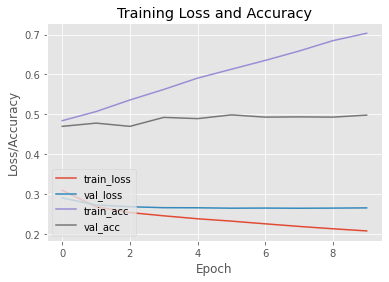

In [9]:
plot_training(history_model_1)